럭키백에 들어갈 수 있는 생선이 총 7종일 때, 7종에 대한 확률을 추측해야 한다.

In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# 포함된 생선 중 유니크한 종이 무엇인지 출력해보자.
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish.drop(columns=['Species']).to_numpy()
fish_target = fish['Species'].to_numpy()
print(fish_input)
print(fish_target)

In [10]:
fish.head()


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
# KNC 알고리즘으로 만든 모델,
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print(kn.predict(test_scaled[:5]))
print(kn.classes_)
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

0.8907563025210085
0.85
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [18]:
# 네번째 샘플의 최근접 이웃 클래스를 확인해본다.
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 근데 predict_proba를 출력했을때 출력되는 확률은 항상 0.33, 0.67, 1 이런형식인데 이건 원하는 결과가 아니다.

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
이름은 회귀지만 분류 모델이다.  
선형 방정식을 시그모이드함수나 로지스틱함수를 활용해 변환한다.  
시그모이드 함수를 사용해서 z가 0과 1사이에 위치하도록 강제한다.  
0과 1사이의 값을 0~100% 확률로 계산할 수 있게 한다.


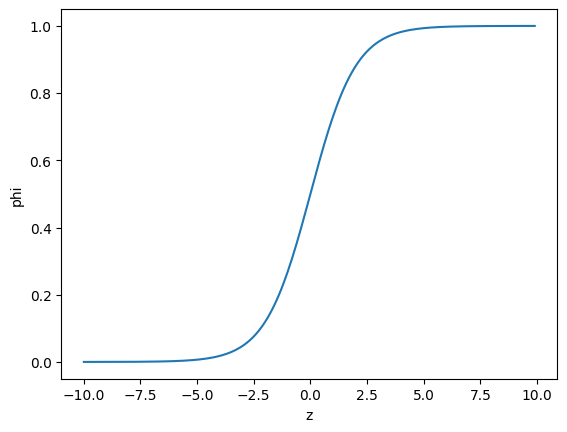

In [20]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10, 10, 0.1)
phi = 1/ (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [22]:
# 도미와 빙어만추출한다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
train_target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes = (test_target == 'Bream') | (test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes]
test_target_bream_smelt = test_target[bream_smelt_indexes]

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, train_target_bream_smelt)
print(lr.score(train_bream_smelt, train_target_bream_smelt))
print(lr.score(test_bream_smelt, test_target_bream_smelt))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict_proba(test_bream_smelt))

1.0
1.0
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[[3.95673649e-02 9.60432635e-01]
 [9.99418084e-01 5.81915885e-04]
 [2.57680368e-02 9.74231963e-01]
 [9.94091561e-01 5.90843851e-03]
 [9.93797733e-01 6.20226656e-03]
 [9.96817784e-01 3.18221559e-03]
 [9.99225520e-01 7.74480128e-04]
 [9.93514755e-01 6.48524496e-03]
 [3.57044604e-02 9.64295540e-01]
 [9.93936205e-01 6.06379522e-03]
 [9.80723479e-01 1.92765210e-02]
 [9.86010826e-01 1.39891744e-02]
 [9.99255437e-01 7.44562504e-04]
 [2.26548421e-02 9.77345158e-01]
 [3.39337587e-02 9.66066241e-01]
 [9.51351276e-01 4.86487238e-02]]


In [ ]:
# 훈련한 모델을 사용해서 처음 5개 모델을 예측해보자
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# predict_proba 메서드는 확률도 제공해준다.
print(lr.predict_proba(train_bream_smelt[:5]))
# 0행과 1행이 어떤 생선을 의미하는지도 출력해보자
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [ ]:
# 선형 회귀가 학습한 방정식을 출력해보자.
print(lr.coef_, lr.intercept_)
# lr.decision_function() 메서드로 로지스틱 회귀에서 구한 함수의 결과인 z값을 출력할 수 있다.
# 출력된 z값은 0과 1 사이가 아니므로 시그모이드로 변환시켜줘야 확률을 구할 수 있다.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# scipy의 expit메서드로 시그모이드 함수로 계산한 결과를 간단히 구할 수 있다.
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기
LR 클래스는 기본적으로 반복적인 알고리즘을 사용한다.  
아래는 다중 분류 모델을 훈련하는 코드이다.

In [36]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해보자  
출력을 간단히 하기 위해 소숫점 3번째까지만 표현  
5개 샘플에 대한 예측이므로 5개의 열을 가진 이차원배열이 출력된다.

In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
[np.argmax(i) for i in proba]

[2, 5, 3, 4, 2]

In [ ]:
[lr.classes_[i] for i in  [np.argmax(i) for i in proba]]

['Perch', 'Smelt', 'Pike', 'Roach', 'Perch']

다중 분류의 경우 시그모이드 함수가 아닌 소프트맥스 함수를 사용한다.  
소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환한다.  
소프트맥스 함수는 여러개의 선형방정식의 출력값을 0~1로 압축하고, 전체 합이 1이 되도록 만든다.

In [ ]:
# 이진 분류에서처럼 decision_function() 메서드로 z1~z7을 구한 다음 소프트맥스 함수를 활용해 바꿔보자

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)
print('softmax\n', np.round(proba, decimals=3))

print('predct_proba\n', np.round(lr.predict_proba(test_scaled[:5]), decimals=3))



[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
softmax
 [[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
predct_proba
 [[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


1. 7개 생선이 들어가는 럭키백의 확률을 명시해야함
2. 예측 뿐만 아니라 예측의 근거가 되는 확률을 찾아야 함
3. KNN이 확률을 출력 가능하지만 항상 정해진 확률만 출력하게된다.
4. 로지스틱 회귀는 분류 모델로서 0~1 사이의 값을 출력하고, 이게 확률이 된다.
5. 이진 분류에는 시그모이드 함수를 사용한다.
6. 다중 분류일 경우 클래스 개수만큼 방정식을 훈련해서 소프트맥스함수를 활용한다.

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)
print(len(train_input), len(test_input))

119 40


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.n_neighbors = 3
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(distances)
print(train_target[indexes])

[[0.20774583 0.24862983 0.33682411]]
[['Roach' 'Perch' 'Perch']]


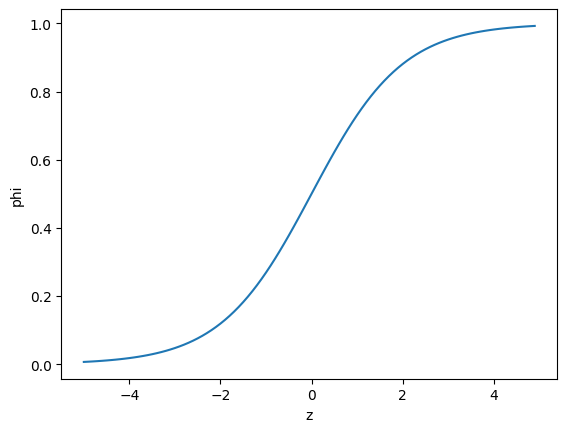

In [ ]:
# 로지스틱 회귀
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
## 로지스틱 회귀로 이진분류 수행하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))


['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
print(lr.coef_, lr.intercept_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# decisions는 z값을 출력하는 배열이다.
# 이를 시그모이드 함수에 넣으면 확률을 구할 수 있다
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 로지스틱 회귀로 다중 분류 수행하기
# C는 릿지와 같이 계수의 제곱을 규제한다. 값이 클수록 규제가 완화된다.
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 다중 분류는 선형방정식이 어떻게 되나?
# 7개의 대상에 대한 분류이므로 z가 7개 계산된다.
# 클래스마다 z를 각각 계산해서, 가장 높은 z값을 갖는 클래스를 예측값으로 설정한다.
# 이를 확률로 변환하기 위한 작업이 softmax함수를 사용하는 것
print(lr.coef_.shape, lr.intercept_.shape)
print(lr.coef_)
print(lr.intercept_)

(7, 5) (7,)
[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]]
[-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [39]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
print(lr.coef_, lr.intercept_)

# 아래는 z 값이다.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# z값을 사이파이의 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
# 수학적으로 당연함
from scipy.special import expit
print(expit(decisions))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [45]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [46]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [47]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
